## Macroeconomical Data

거시경제와 금융시장은 밀접한 연관을 가지고 있다. FOMC에서 금리 인하 발표를 기점으로 예상 금리에 따라 3개월물 금리가 요동치며, 이벤트 발표 전후로 증권시장의 변동성은 급등한다. 유동성은 금융시장의 수급과 밀접한 연관성을 가지며, 때에 따라서는 금융위기로 인해 경기침체를 불러오기도 한다. 거시경제 데이터는 공개된 데이터이므로 전략을 수립하는데 있어서 드라마틱한 결과를 안겨주지는 않지만, 기본적인 데이터이므로 가공에 따라 매우 유용한 데이터가 될 수 있다.

오늘은 다양한 거시경제 데이터를 통해 금융시장에 적용될 수 있는 인사이트를 얻어보도록 한다

### FOMC Dot plot & Probability

2024년 기준 금리 파생상품은 전체 파생상품의 거래 중 70%의 비중을 차지한다. FOMC의 금리 결정은 그만큼 금융시장에 큰 파급을 가져온다. 연준위의 이사들은 이벤트마다 매번 향후 금리의 전망을 예측하는 일종의 설문 데이터를 도식화하여 배포하는데, 이를 FOMC Dot plot이라고 한다. FOMC의 점도표는 연방준비제도(Fed) 이사들이 향후 금리 전망을 점으로 표시한 그래프이다. CME Group에서는 점도표와 관련해 금리에 관한 확률을 제공하고 있다 (https://www.cmegroup.com/ko/markets/interest-rates/cme-fedwatch-tool.html) 이 점도표는 그만큼 투자에 있어서도 매우 중요한 정보를 제공한다고 할 수 있다.

점도표를 분석하면 금리가 오르거나 내릴 가능성을 예측할 수 있다. 예를 들어, 금리가 상승할 것으로 예상되면 주식보다 채권이나 다른 자산으로 포트폴리오를 조정할 수 있다. 이처럼 점도표는 투자 전략을 세우고 리스크를 관리하는 데 중요한 역할을 한다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

fomc_june = pd.read_excel('FOMC0612.xlsx', index_col = 0) # 6월 12일 발표

In [2]:
fomc_june

2024   2025   2026  Longer run
index                                 
0      5.375  5.375  4.875       3.750
1      5.375  4.875  4.125       3.625
2      5.375  4.375  3.625       3.500
3      5.375  4.375  3.625       3.500
4      5.125  4.375  3.625       3.125
5      5.125  4.375  3.375       3.000
6      5.125  4.125  3.375       3.000
7      5.125  4.125  3.375       3.000
8      5.125  4.125  3.125       3.000
9      5.125  4.125  3.125       2.750
10     5.125  4.125  3.125       2.750
11     4.875  4.125  3.125       2.750
12     4.875  4.125  3.125       2.625
13     4.875  4.125  3.125       2.500
14     4.875  4.125  3.125       2.500
15     4.875  3.875  2.875       2.500
16     4.875  3.875  2.875       2.500
17     4.875  3.625  2.625       2.500
18     4.875  2.875  2.375       2.375

점도표에서는 정준모수로 중앙값과 최빈값을 많이 참고한다

In [3]:
fomc_june.mode()

2024   2025   2026  Longer run
0  4.875  4.125  3.125         2.5

In [4]:
fomc_june.median()

2024          5.125
2025          4.125
2026          3.125
Longer run    2.750
dtype: float64

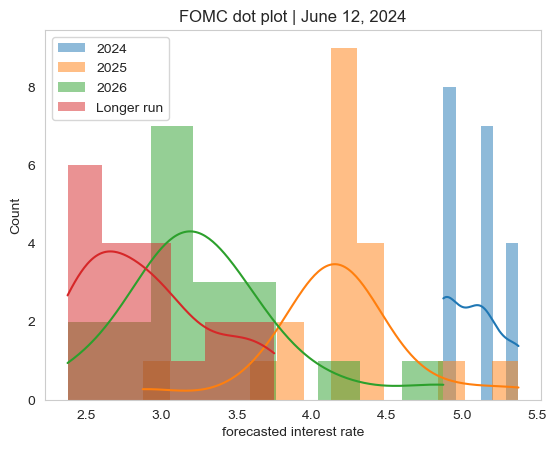

In [6]:
sns.histplot(
    fomc_june.loc[:, 2024], 
    kde = True, 
    edgecolor = 'none',
    label = '2024'
)
sns.histplot(
    fomc_june.loc[:, 2025], 
    kde = True, 
    edgecolor = 'none',
    label = '2025'
)
sns.histplot(
    fomc_june.loc[:, 2026], 
    kde = True, 
    edgecolor = 'none', 
    label = '2026'
)
sns.histplot(
    fomc_june.loc[:, 'Longer run'], 
    kde = True, 
    edgecolor = 'none',
    label = 'Longer run'
)
plt.legend()
plt.grid(False)
plt.xlabel('forecasted interest rate')
plt.title('FOMC dot plot | June 12, 2024')
plt.show()

금리 발표를 전후로 금리와 시장은 어떻게 변화했을까?

In [7]:
import yfinance as yf

interest = pd.read_excel('IRX_1min.xlsx', index_col = 0)
market = pd.read_excel('SPX_1min.xlsx', index_col = 0)
interest.index = pd.to_datetime(interest.index)
market.index = pd.to_datetime(market.index)

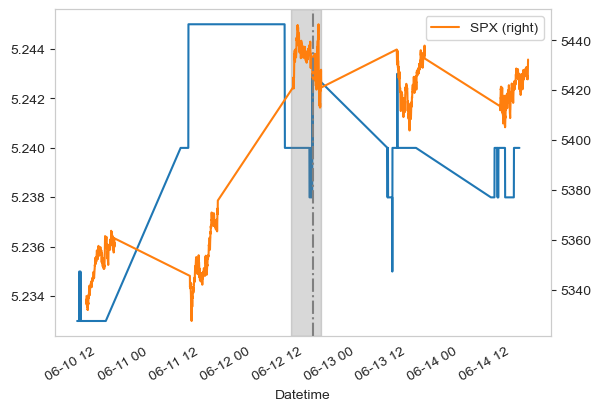

In [9]:
interest['Close'].plot()
plt.grid(False)
market['Close'].plot(secondary_y = True, label = 'SPX')
plt.axvline('2024-06-12 14:00:00', color = 'gray', ls = '-.')
plt.legend()
plt.grid(False)
plt.axvspan('2024-06-12 09:00:00', '2024-06-12 16:00:00', color='gray', alpha=0.3)
plt.show()

FOMC 발표일, 특히 발표 시간에 변동이 극심해지는 것을 알 수 있다

In [10]:
import matplotlib.dates as mdates

market_event = market.loc['2024-06-12']

fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]}, sharex=True, figsize=(10, 6))

for date, row in market_event.iterrows():
    if row['Close'] >= row['Open']:
        color = '#e61673'
        lower = row['Open']
        height = row['Close'] - row['Open']
    else:
        color = '#266EFF'
        lower = row['Close']
        height = row['Open'] - row['Close']

    ax1.add_patch(plt.Rectangle((mdates.date2num(date) - 0.0007, lower), 0.0001, height, color=color))
    ax1.plot([mdates.date2num(date), mdates.date2num(date)], [row['Low'], row['High']], color=color)
    ax1.grid(False)

ax2.bar(market_event.index, market_event['Volume'], width=0.0014, color='#f8b62d')

ax1.axvline(pd.to_datetime('2024-06-12 14:00:00'), color='gray', linestyle='-.')
ax2.axvline(pd.to_datetime('2024-06-12 14:00:00'), color='gray', linestyle='-.')

ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.xticks(rotation=45)

ax1.set_title('SPX | 2024-06-12')
ax1.set_ylabel('Price')
ax2.set_ylabel('Volume')
ax2.set_xlabel('Date')
ax2.grid(False)

plt.tight_layout()
plt.show()


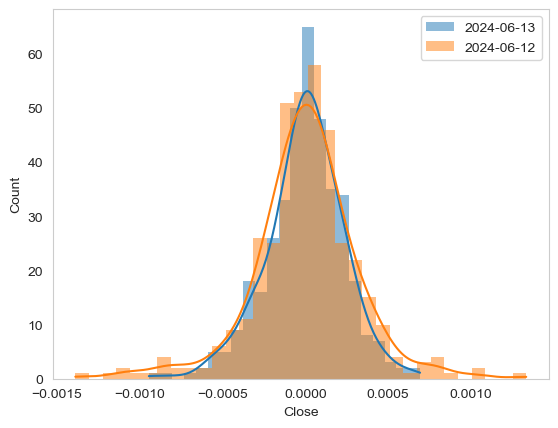

In [11]:
sns.histplot(
    market.loc['2024-06-13', 'Close'].pct_change(), 
    edgecolor = 'none',
    kde = True,
    label = '2024-06-13'
)
sns.histplot(
    market.loc['2024-06-12', 'Close'].pct_change(), 
    edgecolor = 'none',
    kde = True,
    label = '2024-06-12'
)
plt.legend()
plt.grid(False)
plt.show()

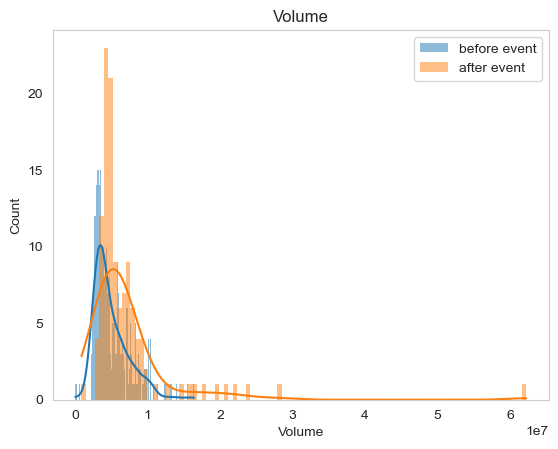

In [12]:
sns.histplot(
    market.loc['2024-06-12 09:00:00':'2024-06-12 13:59:00', 'Volume'], 
    edgecolor = 'none',
    kde = True,
    label = 'before event',
    bins = 100
)
sns.histplot(
    market.loc['2024-06-12 14:00:00':'2024-06-12 16:00:00', 'Volume'], 
    edgecolor = 'none',
    kde = True,
    label = 'after event',
    bins = 100
)
plt.grid(False)
plt.legend()
plt.title('Volume')
plt.show()

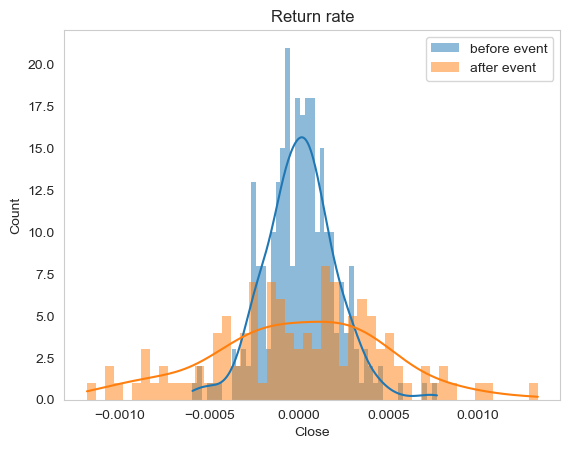

In [13]:
sns.histplot(
    market.loc['2024-06-12 09:00:00':'2024-06-12 13:59:00', 'Close'].pct_change(), 
    edgecolor = 'none',
    kde = True,
    label = 'before event',
    bins = 50
)
sns.histplot(
    market.loc['2024-06-12 14:00:00':'2024-06-12 16:00:00', 'Close'].pct_change(), 
    edgecolor = 'none',
    kde = True,
    label = 'after event',
    bins = 50
)
plt.grid(False)
plt.legend()
plt.title('Return rate')
plt.show()

**이벤트 기반의 베팅**

금리 발표를 전후로 변동성이 굉장히 높기 때문에, 이를 이용한 거래 전략을 수립할 수 있다. 이벤트 발표 이전까지 시장이 횡보할 가능성이 높기 때문에, 기술적 지표를 기반으로 하여 매매를 행할 수 있다.

In [14]:
from ta.momentum import rsi

event_rsi = rsi(market.loc['2024-06-12', 'Close'], window = 14)

In [15]:
market.loc['2024-06-12', 'Close'].plot(label = 'price', figsize = (8, 5))
plt.grid(False)
event_rsi.plot(secondary_y = True, label = 'RSI', ls = '-.')
event_rsi.rolling(window = 14).mean().plot(secondary_y = True, label = 'rolling RSI')
plt.legend()
plt.grid(False)
plt.axhline(y = 40, color = 'lightgray', linestyle = '--')
plt.axhline(y = 60, color = 'lightgray', linestyle = '--')
plt.axvline(pd.to_datetime('2024-06-12 14:00:00'), color = 'gray', ls = '-.')
plt.show()

#### Probability of FED Rate

CME Group은 FOMC 금리 발표와 관련해 각 금리가 발표될 확률을 발표한다. csv파일의 형태로 되어 있으며, 필요시 자유롭게 다운이 가능하다. basis point기준으로 column이 채워져 있다

In [16]:
june_forecast = pd.read_csv('FedMeeting_20240612.csv', index_col = 0)
june_forecast.index = pd.to_datetime(june_forecast.index)
june_forecast.head()

(0-25)  (25-50)  (50-75)  (75-100)  (100-125)  (125-150)  \
Date                                                                   
2023-07-03     0.0      0.0      0.0       0.0        0.0        0.0   
2023-07-05     0.0      0.0      0.0       0.0        0.0        0.0   
2023-07-06     0.0      0.0      0.0       0.0        0.0        0.0   
2023-07-07     0.0      0.0      0.0       0.0        0.0        0.0   
2023-07-10     0.0      0.0      0.0       0.0        0.0        0.0   

            (150-175)  (175-200)  (200-225)  (225-250)  ...  (1275-1300)  \
Date                                                    ...                
2023-07-03        0.0        0.0        0.0        0.0  ...          0.0   
2023-07-05        0.0        0.0        0.0        0.0  ...          0.0   
2023-07-06        0.0        0.0        0.0        0.0  ...          0.0   
2023-07-07        0.0        0.0        0.0        0.0  ...          0.0   
2023-07-10        0.0        0.0        0.0        0.0  ...          0.0   

            (1300-1325)  (1325-1350)  (1350-1375)  (1375-1400)  (1400-1425)  \
Date                                                                          
2023-07-03          0.0          0.0          0.0          0.0          0.0   
2023-07-05          0.0          0.0          0.0          0.0          0.0   
2023-07-06          0.0          0.0          0.0          0.0          0.0   
2023-07-07          0.0          0.0          0.0          0.0          0.0   
2023-07-10          0.0          0.0          0.0          0.0          0.0   

            (1425-1450)  (1450-1475)  (1475-1500)  (1500-1525)  
Date                                                            
2023-07-03          0.0          0.0          0.0          0.0  
2023-07-05          0.0          0.0          0.0          0.0  
2023-07-06          0.0          0.0          0.0          0.0  
2023-07-07          0.0          0.0          0.0          0.0  
2023-07-10          0.0          0.0          0.0          0.0  

[5 rows x 61 columns]

### NBER Regime Indicator

In [17]:
import pandas_datareader as pdr

recession_indicator = pdr.get_data_fred('USREC', start = '1980-01-01', end = pd.to_datetime('today'))

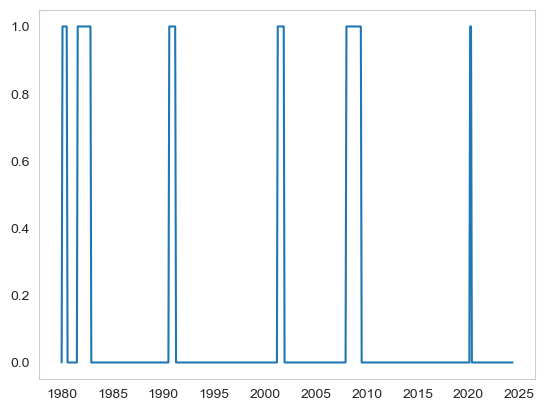

In [18]:
plt.plot(recession_indicator)
plt.grid(False)
plt.show()

### FOREX

In [19]:
eur_usd = yf.download(
    'EURUSD=X', 
    start = '2010-01-01',
    end = pd.to_datetime('today'),
    progress = False,
    interval = '1d'
)
spx = yf.download(
    '^GSPC',
    start = '2010-01-01',
    end = pd.to_datetime('today'),
    progress = False,
    interval = '1d'
)

In [21]:
eur_usd['Close'].pct_change().plot(
    lw = 0.5,
    alpha = 0.8,
    figsize = (8, 5),
    label = 'EURUSD'
)
spx['Close'].pct_change().plot(
    lw = 0.5,
    alpha = 0.8,
    label = 'SPX'
)
plt.legend()
plt.grid(False)
plt.show()

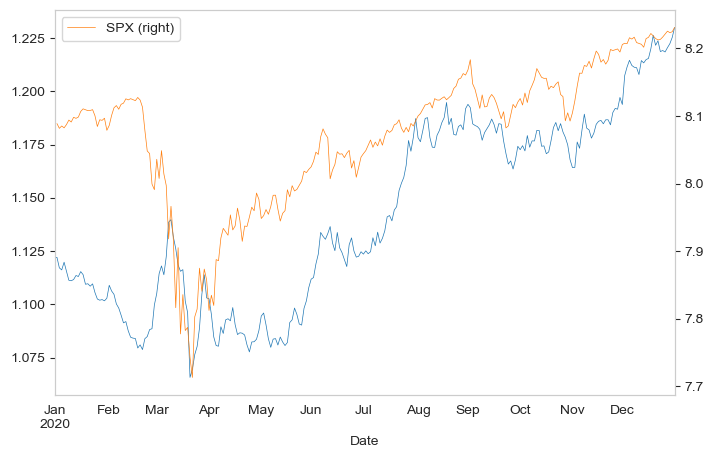

In [23]:
eur_usd.loc['2020', 'Close'].plot(
    lw = 0.5,
    figsize = (8, 5),
    label = 'EURUSD'
)
plt.grid(False)
np.log(spx['Close'].loc['2020']).plot(
    lw = 0.5,
    label = 'SPX',
    secondary_y = True
)
plt.grid(False)
plt.legend()
plt.show()

In [24]:
inter_index = list(set(spx.index).intersection(eur_usd.index))

In [25]:
spx.loc[pd.to_datetime(inter_index), 'Close'].sort_index().pct_change()

2010-01-04         NaN
2010-01-05    0.003116
2010-01-06    0.000546
2010-01-07    0.004001
2010-01-08    0.002882
                ...   
2024-06-27    0.000907
2024-06-28   -0.004084
2024-07-01    0.002676
2024-07-02    0.006195
2024-07-03    0.005084
Name: Close, Length: 3644, dtype: float64

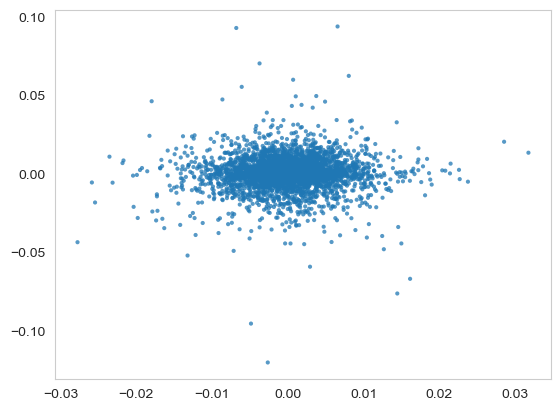

In [27]:
plt.scatter(
    eur_usd.loc[pd.to_datetime(inter_index), 'Close'].sort_index().pct_change(),
    spx.loc[pd.to_datetime(inter_index), 'Close'].sort_index().pct_change(),
    marker = '.',
    edgecolor = 'none',
    alpha = 0.75
)
plt.grid(False)
plt.show()

### Bond Spread

#### T Bond 금리

In [28]:
tbill_3mon = pdr.get_data_fred(
    'DGS3MO',
    start = '2000-01-01',
    end = pd.to_datetime('today')
)
tbill_6mon = pdr.get_data_fred(
    'DGS6MO',
    start = '2000-01-01',
    end = pd.to_datetime('today')
)
tbond_1y = pdr.get_data_fred(
    'DGS1',
    start = '2000-01-01',
    end = pd.to_datetime('today')
)
tbond_2y = pdr.get_data_fred(
    'DGS2',
    start = '2000-01-01',
    end = pd.to_datetime('today')
)
tbond_3y = pdr.get_data_fred(
    'DGS3',
    start = '2000-01-01',
    end = pd.to_datetime('today')
)
tbond_5y = pdr.get_data_fred(
    'DGS5',
    start = '2000-01-01',
    end = pd.to_datetime('today')
)
tbond_7y = pdr.get_data_fred(
    'DGS7',
    start = '2000-01-01',
    end = pd.to_datetime('today')
)
tbond_10y = pdr.get_data_fred(
    'DGS10',
    start = '2000-01-01',
    end = pd.to_datetime('today')
)
tbond_20y = pdr.get_data_fred(
    'DGS20',
    start = '2000-01-01',
    end = pd.to_datetime('today')
)
tbond_30y = pdr.get_data_fred(
    'DGS30',
    start = '2000-01-01',
    end = pd.to_datetime('today')
)

In [29]:
bond_rate = pd.concat(
    [
        tbill_3mon,
        tbill_6mon,
        tbond_1y,
        tbond_2y,
        tbond_3y,
        tbond_5y,
        tbond_7y,
        tbond_10y,
        tbond_20y,
        tbond_30y,
    ], axis = 1
).resample('W').last() * 0.01

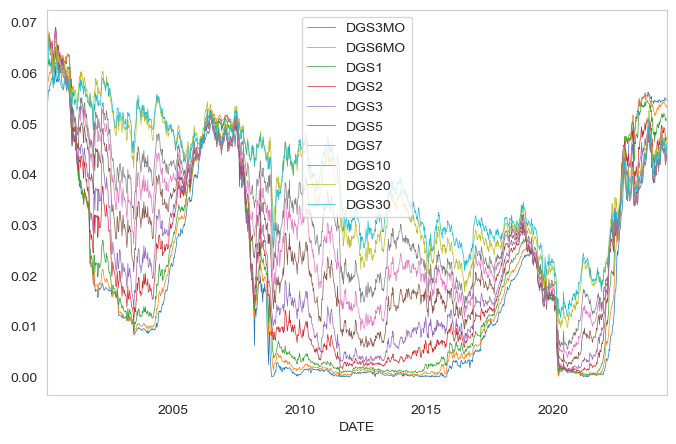

In [87]:
bond_rate.plot(figsize = (8, 5), lw = 0.5)
plt.grid(False)

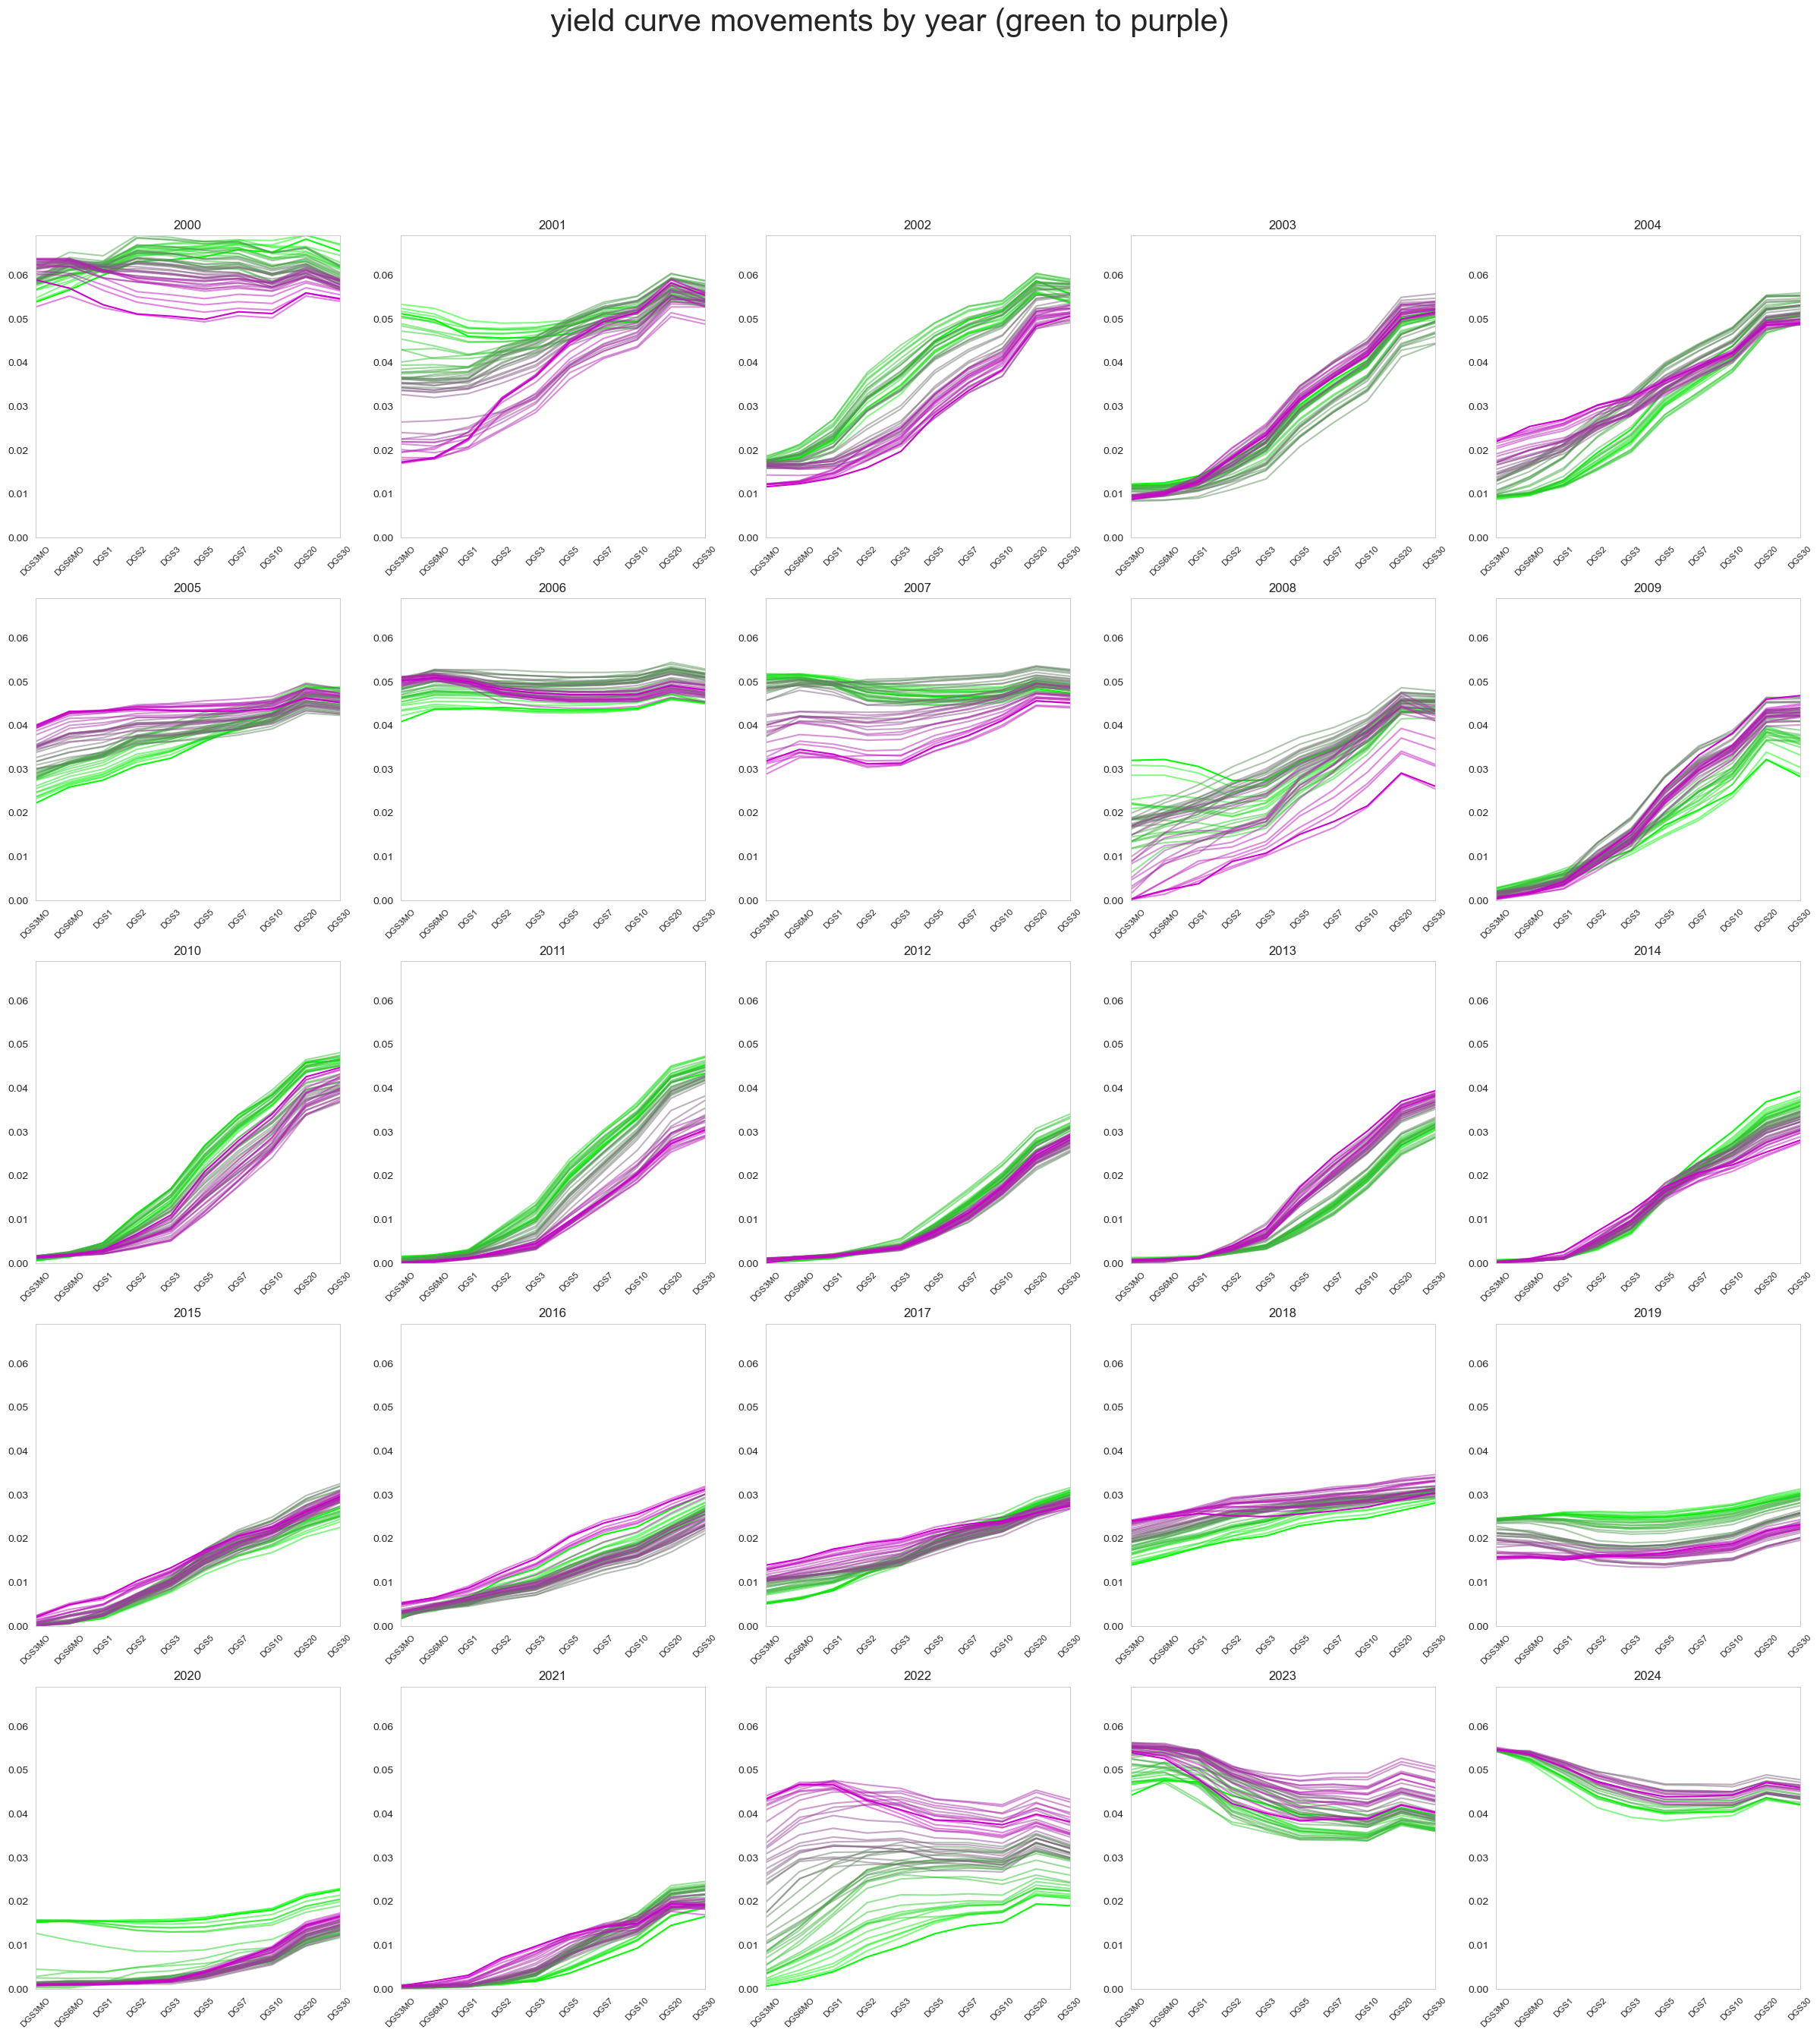

In [32]:
cols = 5
num_years = bond_rate.index.max().year - bond_rate.index.min().year
rows = int(np.ceil(num_years/cols))

plt.figure(figsize = (30, (30 / cols) * rows))
plt.suptitle('yield curve movements by year (green to purple)', fontsize = 30)

colnum = 0
rownum = 0
for year in range(bond_rate.index.min().year, bond_rate.index.max().year+1):
    year_start = f'{year}-01-01'
    year_end = f'{year}-12-31'
    
    plt.subplot2grid((rows, cols), (rownum, colnum), colspan=1, rowspan=1)
    plt.title('{0}'.format(year))
    plt.xlim(0, len(bond_rate.columns)-1)
    plt.ylim(np.min(bond_rate.values), np.max(bond_rate.values))
    plt.grid(False)
    plt.xticks(range(len(bond_rate.columns)), bond_rate.columns, size='small', rotation = 45)
    
    year_curves = bond_rate.loc[year_start:year_end].values    
    gradient = np.linspace([0, 1, 0, 1], [0.8, 0, 0.8, 1], year_curves.shape[0])
    gradient[1:-1, -1] = 0.5
    
    for y, colour in zip(year_curves, gradient):
        plt.plot(y, c=colour)

    if colnum != cols-1:
        colnum += 1
    else:
        colnum = 0
        rownum += 1

In [33]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import regularizers, models, optimizers

from sklearn.decomposition import PCA

pca_model = PCA(n_components = 3, copy = True, whiten = False)
pca_model.fit(bond_rate)

PCA(n_components=3)

In [34]:
df_pca = pd.DataFrame(
    pca_model.transform(bond_rate),
    index = bond_rate.index
)
df_pca_recon = pd.DataFrame(
    pca_model.inverse_transform(df_pca),
    index = bond_rate.index,
    columns = bond_rate.columns
)

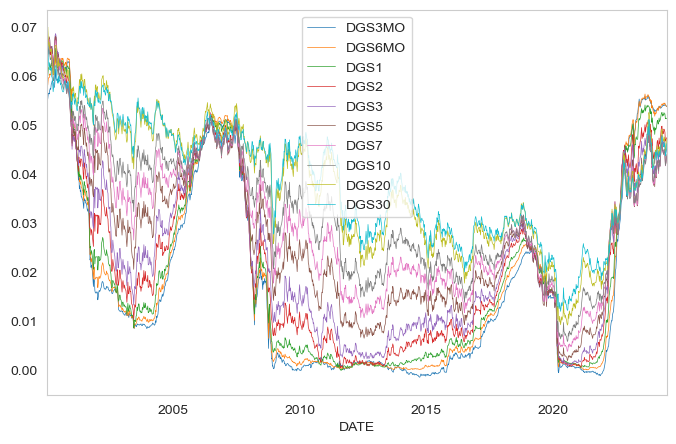

In [88]:
df_pca_recon.plot(figsize = (8, 5), lw = 0.5)
plt.grid(False)
plt.show()

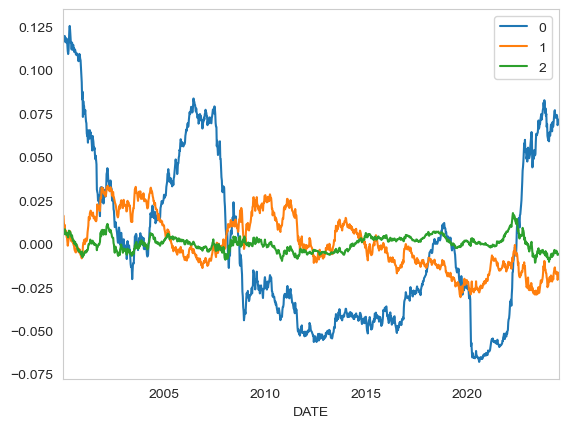

In [36]:
df_pca.plot()
plt.grid(False)
plt.show()

In [37]:
plt.figure(figsize = (8,4))
plt.plot(
    bond_rate.index, 
    df_pca_recon - bond_rate.values,
    lw = 0.5,
    alpha = 0.75
)
plt.legend(bond_rate.columns, loc = 'upper left', bbox_to_anchor = (1, 1))
plt.grid(False)
plt.show()

In [38]:
for i, pc in enumerate(pca_model.explained_variance_ratio_):
    print('PC {0}:\t{1:5.2f}%'.format(i+1, pc*100.0))

PC 1:	89.57%
PC 2:	 9.58%
PC 3:	 0.72%


In [39]:
fig = plt.figure(figsize = (8,4))
plt.title('Contribution of each variable to first {0} PCA components'.format(pca_model.n_components))

plt.plot(np.transpose(pca_model.components_[0]), label = 'PC 1')
plt.plot(np.transpose(pca_model.components_[1]), label = 'PC 2')
plt.plot(np.transpose(pca_model.components_[2]), label = 'PC 3')
plt.xticks(range(len(bond_rate.columns)), bond_rate.columns)
plt.grid(False)

plt.legend();

#### 비선형 PCA로써의 Autoencoder

선형 오토인코더로 차원 축소를 진행해 보자, epochs는 1000, dimension은 3으로 지정한다

In [40]:
def LinearAutoEncoder(
        y, 
        dimension, 
        learning_rate = 1e-4, 
        regularization = 1e-5, 
        epochs=10 
):
    
    input_layer = Input(shape=(y.shape[1],))
    encoder = Dense(
        dimension, 
        activation = 'linear',
        kernel_regularizer = regularizers.l2(regularization)
    )(input_layer)
    decoder = Dense(
        y.shape[1], 
        activation = 'linear',
        kernel_regularizer=regularizers.l2(regularization)
    )(encoder)
    
    autoencoder = models.Model(input_layer, decoder)
    autoencoder.compile(
        optimizer = optimizers.Adam(learning_rate = learning_rate), 
        loss = 'mean_squared_error'
    )
    
    autoencoder.fit(
        y, y, 
        epochs = epochs, 
        batch_size = 4, 
        shuffle = True,
        verbose = 0
    )
    
    return autoencoder

In [41]:
autoencoder = LinearAutoEncoder(
    bond_rate.values, 
    dimension = 3, 
    regularization = 0, 
    epochs = 1000
)

2024-07-05 00:06:29.399059: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


decoder weight matrix로부터 singular vector를 추출한다

In [42]:
(w1, b1, w2, b2) = autoencoder.get_weights()

In [43]:
(ae_decoder_lsv, _, _) = np.linalg.svd(w2.T, full_matrices = False)

In [44]:
mu = np.mean(bond_rate.values, axis=0)
ae_lsv_projections = np.array(bond_rate.values-mu) @ ae_decoder_lsv

차원 축소된 matrix를 생성한다

In [45]:
df_ae = pd.DataFrame(ae_lsv_projections, index = bond_rate.index)

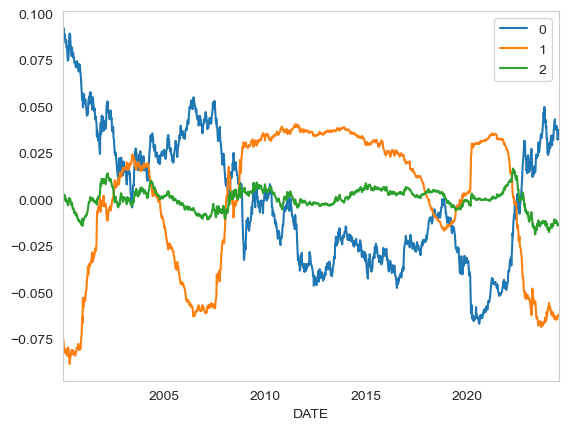

In [48]:
df_ae.plot()
plt.grid(False)
plt.show()

#### Compare the transformed sample covariances

sample covariance matrix C를 선언하자

In [49]:
C = np.dot((bond_rate - mu).T, bond_rate - mu)

total variance는 covariance matrix의 diagonal elements 합으로 이뤄진다. 

In [50]:
total_variance = np.sum(np.diag(C))
print('total variance:', total_variance)

total variance: 3.3453010862236128


Diagonalize the sample covariance matrix with the m-loading vectors:
$$\text{P}_m^T \text{Y}_0 \text{Y}_0^T \text{P}_m$$

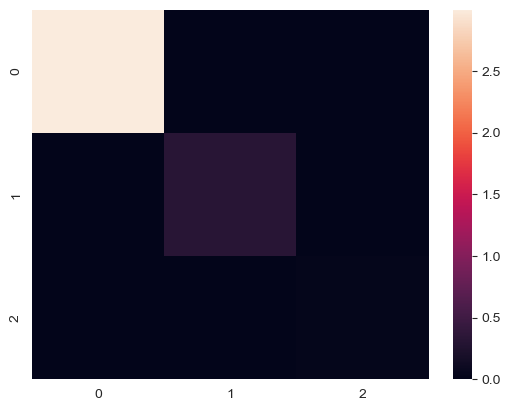

In [53]:
lambda_from_pca = pca_model.components_ @ C @ pca_model.components_.T

sns.heatmap(lambda_from_pca, annot = False)
plt.show()

covariance matrix를 보면 첫 번째 주성분이 대부분의 변동을 설명하는 것을 알 수 있다

In [54]:
print(100 * np.diag(lambda_from_pca) / total_variance)
print('{:.6}% of total variance explained'.format(100 * np.sum(np.diag(lambda_from_pca)) / total_variance))

[89.56640117  9.57508014  0.72235315]
99.8638% of total variance explained


이제 decoder의 weight를 사용하여 공분산 행렬의 변환을 수행한다. 행렬 $\Lambda$는 더 이상 대각행렬이 아니다

In [55]:
lambda_from_decoder_weights = w2 @ C @ w2.T

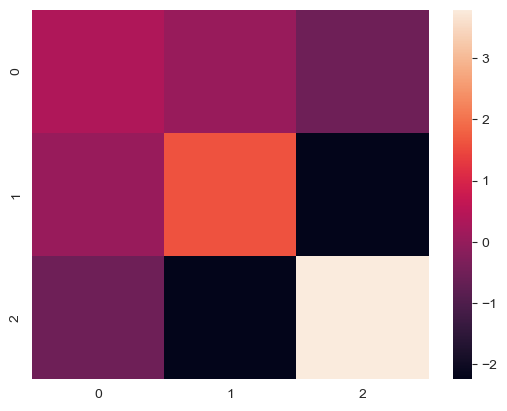

In [58]:
sns.heatmap(lambda_from_decoder_weights, annot = False)
plt.show()

마지막으로 decoder weight의 left singular matrix를 사용하여 공분산 행렬의 변환을 수행한다. 공분산 행렬은 대각화되지 않지만 정렬된 각 대각선 요소가 설명하는 분산의 비율은 PCA에서 얻은 값과 유사하다는 것을 알 수 있다

In [59]:
lambda_from_decoder_lsv = ae_decoder_lsv.T @ C @ ae_decoder_lsv

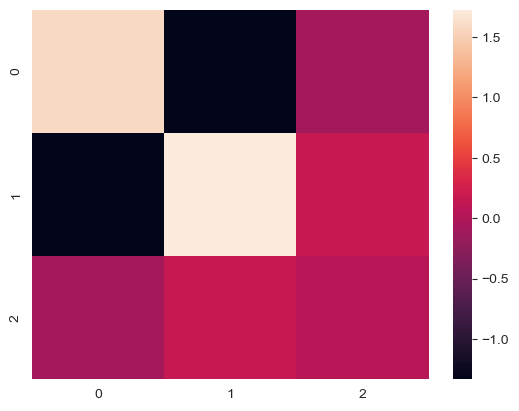

In [63]:
sns.heatmap(lambda_from_decoder_lsv, annot = False)
plt.show()

Auto encoder 모형에서 추정된 설명된 분산 비율을 보자

In [64]:
print(100 * np.diag(lambda_from_decoder_lsv) / total_variance)
print('{:.6}% of total variance explained'.format(100*np.sum(np.diag(lambda_from_decoder_lsv)) / total_variance))

[46.95867119 51.58183032  1.32317027]
99.8637% of total variance explained


#### Recontruct Data

Auto Encoder의 decoding network를 통해 data를 generating할 수 있다. 우선, 학습된 모형으로부터 generating해 보자

In [65]:
df_ae_recon = autoencoder.predict(bond_rate.values)

40/40 [==============================] - 0s 295us/step


In [66]:
df_ae_recon = pd.DataFrame(
    df_ae_recon,
    index = bond_rate.index,
    columns = bond_rate.columns
)

In [67]:
df_ae_recon.head()

DGS3MO    DGS6MO      DGS1      DGS2      DGS3      DGS5  \
DATE                                                                     
2000-01-09  0.054189  0.056790  0.058437  0.061869  0.063613  0.065576   
2000-01-16  0.054415  0.057281  0.059296  0.063308  0.065291  0.067321   
2000-01-23  0.055324  0.058160  0.060097  0.063995  0.065909  0.067871   
2000-01-30  0.056042  0.059185  0.061343  0.065247  0.066852  0.067865   
2000-02-06  0.056460  0.059652  0.061776  0.065470  0.066842  0.067384   

                DGS7     DGS10     DGS20     DGS30  
DATE                                                
2000-01-09  0.066405  0.065311  0.068395  0.064355  
2000-01-16  0.068041  0.066703  0.069581  0.065293  
2000-01-23  0.068558  0.067196  0.070071  0.065733  
2000-01-30  0.067808  0.065656  0.067570  0.063028  
2000-02-06  0.067016  0.064576  0.066116  0.061554

그러면 각 변수의 재구성된 값을 모든 점에 대한 원래 값과 비교하여 그림을 그릴 수 있다. 차원 축소에 의해 도입된 차이는 대각성분으로부터의 편차로 나타난다

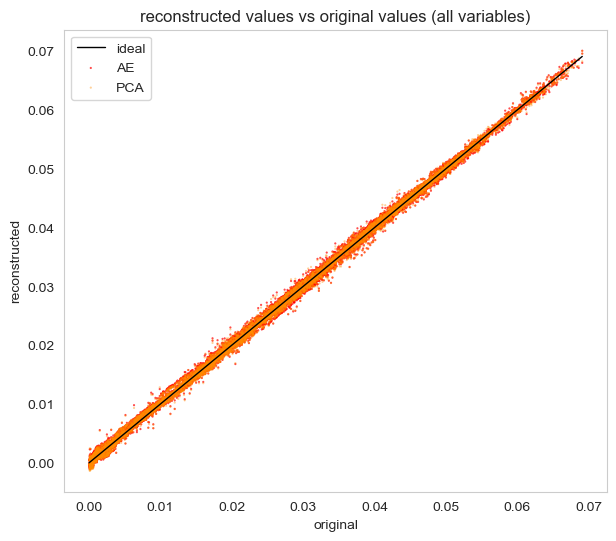

In [76]:
plt.figure(figsize = (7, 6))
plt.title('reconstructed values vs original values (all variables)')
xy = np.linspace(bond_rate.values.min(), bond_rate.values.max(), 2)

plt.plot(xy, xy, c = 'black', lw = 1) # y = x
plt.scatter(bond_rate.values, df_ae_recon, marker = '.', alpha = 0.7, s = 10, edgecolor = 'none', color = 'red') 
plt.scatter(bond_rate.values, df_pca_recon, marker = '.', alpha = 0.4, s = 10, edgecolor = 'none', color = 'darkorange') 
plt.grid(False)

plt.xlabel('original')
plt.ylabel('reconstructed')
plt.legend(['ideal', 'AE', 'PCA']);

**Visualize the data projected onto the principal component**

먼저 PCA에서 얻은 주성분에 대한 데이터를 보여주고 decode weight matrix의 left singular vector를 사용하여 데이터를 보여준다

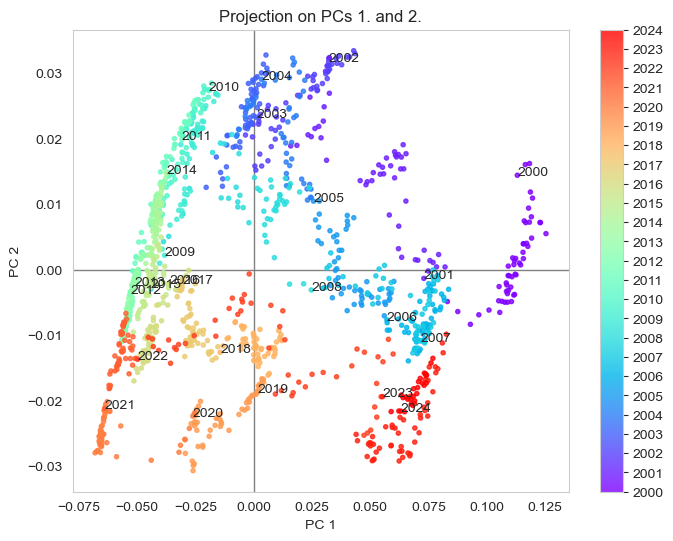

In [83]:
from datetime import datetime
pc1 = 0
pc2 = 1

merged_years = 1

fig = plt.figure(figsize = (8,6))
plt.title('Projection on PCs {0}. and {1}.'.format(pc1+1,pc2+1))
plt.xlabel('PC ' + str(pc1+1))
plt.ylabel('PC ' + str(pc2+1))
plt.axhline(y=0,c="grey",linewidth=1.0,zorder=0)
plt.axvline(x=0,c="grey",linewidth=1.0,zorder=0)
plt.grid(False)
    
sc = plt.scatter(df_pca.loc[:, pc1], df_pca.loc[:, pc2], 
                 c = [d.year for d in df_pca.index], cmap = 'rainbow',
                 marker = '.', alpha = 0.8)
cb = plt.colorbar(sc)
cb.set_ticks(ticks=np.unique([d.year for d in df_pca.index])[::1])
cb.set_ticklabels(np.unique([d.year for d in df_pca.index])[::1])

for year in range(df_pca.index.min().year, df_pca.index.max().year+1, merged_years):
    year_start = df_pca.index[df_pca.index.searchsorted(datetime(year, 1, 1))]
    year_end = df_pca.index[df_pca.index.searchsorted(datetime(year + merged_years-1, 7, 3))]
    
    plt.annotate('{0}'.format(year), xy=(df_pca.loc[year_start, pc1],df_pca.loc[year_start, pc2]), 
                 xytext=(df_pca.loc[year_start,pc1],df_pca.loc[year_start,pc2]));

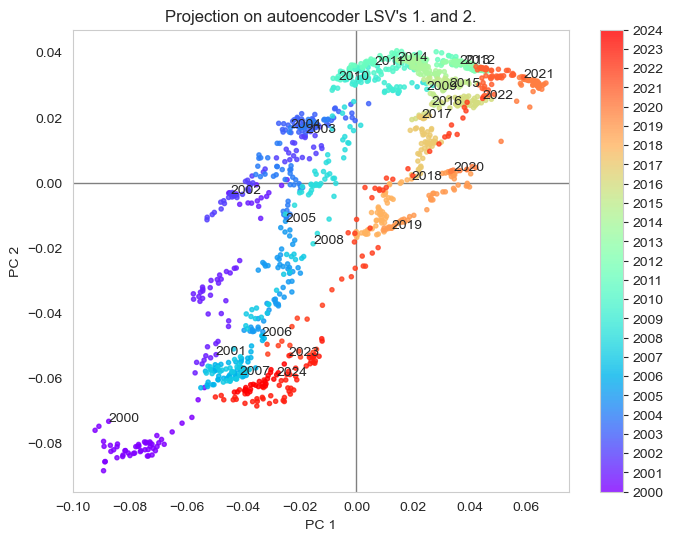

In [85]:
pc1 = 0
pc2 = 1

merged_years = 1
fig = plt.figure(figsize = (8, 6))
plt.title('Projection on autoencoder LSV\'s {0}. and {1}.'.format(pc1+1,pc2+1))
plt.xlabel('PC ' + str(pc1+1))
plt.ylabel('PC ' + str(pc2+1))
plt.axhline(y = 0, c = "grey", linewidth = 1.0, zorder = 0)
plt.axvline(x = 0, c = "grey", linewidth = 1.0, zorder = 0)
plt.grid(False)
    
sc = plt.scatter(-df_ae.loc[:,pc1], df_ae.loc[:,pc2], 
                 c=[d.year for d in df_ae.index], cmap = 'rainbow', 
                 marker = '.', alpha = 0.8)
cb = plt.colorbar(sc)
cb.set_ticks(ticks = np.unique([d.year for d in df_ae.index])[::1])
cb.set_ticklabels(np.unique([d.year for d in df_ae.index])[::1])

for year in range(df_ae.index.min().year, df_ae.index.max().year+1, merged_years):
    year_start = df_ae.index[df_ae.index.searchsorted(datetime(year,1,1))]
    year_end = df_ae.index[df_ae.index.searchsorted(datetime(year+merged_years-1,7,3))]
    plt.annotate('{0}'.format(year), xy=(-df_ae.loc[year_start,pc1],df_ae.loc[year_start,pc2]), 
                 xytext=(-df_ae.loc[year_start,pc1],df_ae.loc[year_start,pc2]))

Auto Encoder를 통해 차원 축소된 데이터는 경기 국면의 유사성에 맞게 가깝게 배치되는 특징을 보인다. 

#### Credit Premium

2008년 금융 위기는 SubPrime Mortgage로부터 촉발되었다. 자산 유동화증권(ABS)를 기초자산으로 하는 부채 담보부증권(CDO)의 신용보강이 무분별하게 이뤄지면서 신용 인플레이션이 급격히 일어났다. 저축은행으로부터 발생한 신용 인플레이션의 유동성은 곧 시장에 엄청난 자금을 공급했다. 결과적으로 버블이 쉽게 생기게 된 것이다.

이러한 일련의 과정은 하루아침에 이뤄진 것이 아니다. 2004년부터 이미 상승하던 금리는 (Great Expansion에 익숙했던) 투자자들에게 좀 더 위험한 투자자산에 베팅을 하도록 유도했고, 이 결과로 CDS Premium이 상승하였다. 2008년 Financial Crisis 이전에 이미 위험 신호는 켜졌던 것이다.

In [92]:
junk_yield = pdr.get_data_fred(
    'BAMLH0A3HYCEY', # ICE BofA CCC & Lower US High Yield Index Effective Yield
    start = '2000-01-01',
    end = pd.to_datetime('today')
) * 0.01

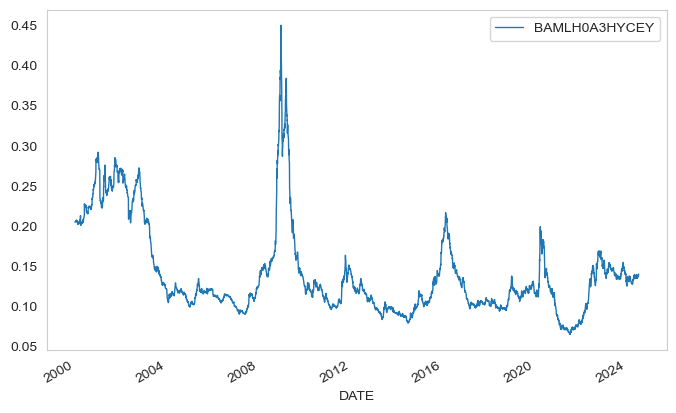

In [97]:
junk_yield.dropna().plot(figsize = (8, 5), lw = 1)
plt.grid(False)
plt.show()

실제로 2008년 금융 위기 이전, 2007년부터 CCC혹은 그 이하 등급의 회사채 수익률이 급등했다

In [99]:
spx = yf.download(
    '^GSPC',
    start = '2000-01-01',
    end = pd.to_datetime('today'),
    progress = False
)

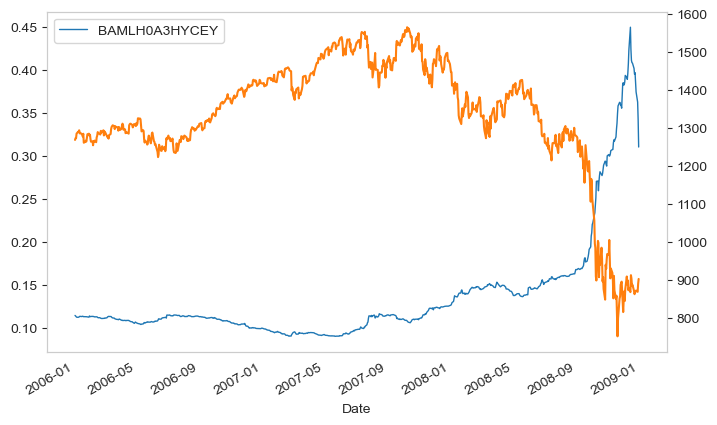

In [105]:
junk_yield.dropna().loc['2006':'2008'].plot(figsize = (8, 5), lw = 1, grid = False)
spx.loc['2006':'2008', 'Close'].plot(secondary_y = True)
plt.grid(False)
plt.show()

### Regime Classification